In [182]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

In [183]:
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP, version=:v2);
ini.equilibrium.κ = 2.15
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.05
ini.equilibrium.𝚶 = 0.0

mhx_order = 5
R0 = 5.0
eps = 1/3.5
a = R0*eps
kapu = 1.86
kapl = 1.85
delu = 0.3
dell = 0.3
zetaou = -0.2
zetaol = -0.0
zetaiu = -0.0
zetail = -0.2
upnull = false
lonull = false

r, z, zref = try
    IMAS.boundary_shape(; a, eps, kapu, kapl, delu, dell, zetaou, zetaiu, zetaol, zetail, zoffset=0.0, upnull, lonull)
catch e
    [NaN], [NaN], [NaN]
end

mxh = IMAS.MXH(r, z, mhx_order)
mxh_vect = IMAS.flat_coeffs(mxh)

ini.equilibrium.boundary_from = :MXH_params
ini.equilibrium.MXH_params = mxh_vect
ini.equilibrium.field_null_surface = 0.8
ini.equilibrium.xpoints = :lower

ini.build.plasma_gap = 0.125
ini.build.divertors = :lower
ini.build.symmetric = false

false

In [184]:
chk = FUSE.Checkpoint()
FUSE.init(dd, ini, act);
chk[:init] = dd, ini, act;

[ Info: Equilibrium
[ Info:  TEQUILA


[ Info: HCD


[ Info:  ECsimple
[ Info:  ICsimple


[ Info:  LHsimple


[ Info:  NBsimple


[ Info: SteadyStateCurrent


[ Info: CXbuild


In [185]:
p = plot(dd.equilibrium; cx=true ,label="init")

dd, ini, act = chk[:init];
actor=FUSE.ActorTEQUILA(dd,act;free_boundary=true);
#plot(dd.equilibrium;cx=true)
#plot!(dd.pf_active)

[ Info: TEQUILA


ErrorException: Error on entry, no approximation returned. The following conditions
must hold:
1<=k<=5
x[1] < x[2] < ... < x[end]
w[i] > 0.0 for all i

Additionally, if spline knots are given:
length(xknots) <= length(x) + k + 1
x[1] < xknots[1] < xknots[k+2] < ... < xknots[end] < x[end]
The schoenberg-whitney conditions: there must be a subset of data points
xx[j] such that t[j] < xx[j] < t[j+k+1] for j=1,2,...,n-k-1

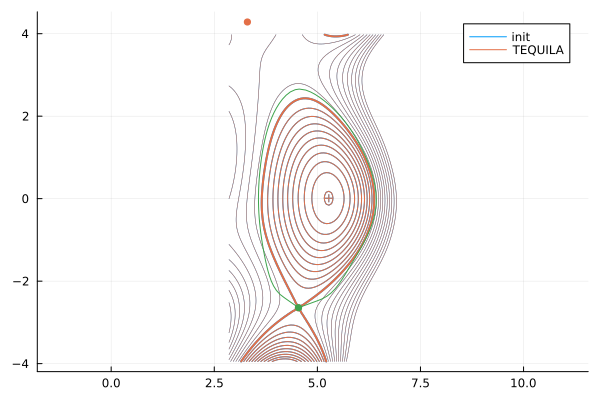

In [186]:
empty!(dd.pf_active)
FUSE.finalize(actor)
plot!(p, dd.equilibrium; cx=true, show_x_points=true, label="TEQUILA")
plot!(p, dd.pulse_schedule.position_control, label="position_control")

In [187]:
dd.pulse_schedule.position_control

position_control
├─ boundary_outline
│  ├─ 1
│  │  ├─ r
│  │  │  └─ reference
│  │  │     ├─ data ➡ [6.10607,4.56113,4.56113] [mixed]
│  │  │     └─ time ➡ [-Inf,100,Inf] [s]
│  │  └─ z
│  │     └─ reference
│  │        ├─ data ➡ [-0.106595,2.65757,2.65757] [mixed]
│  │        └─ time ➡ [-Inf,100,Inf] [s]
│  ├─ 2
│  │  ├─ r
│  │  │  └─ reference
│  │  │     ├─ data ➡ [6.10387,4.71856,4.71856] [mixed]
│  │  │     └─ time ➡ [-Inf,100,Inf] [s]
│  │  └─ z
│  │     └─ reference
│  │        ├─ data ➡ [-0.175806,2.63339,2.63339] [mixed]
│  │        └─ time ➡ [-Inf,100,Inf] [s]
│  ├─ 3
│  │  ├─ r
│  │  │  └─ reference
│  │  │     ├─ data ➡ [6.09729,4.83938,4.83938] [mixed]
│  │  │     └─ time ➡ [-Inf,100,Inf] [s]
│  │  └─ z
│  │     └─ reference
│  │        ├─ data ➡ [-0.244739,2.58557,2.58557] [mixed]
│  │        └─ time ➡ [-Inf,100,Inf] [s]
│  ├─ 4
│  │  ├─ r
│  │  │  └─ reference
│  │  │     ├─ data ➡ [6.08635,4.95352,4.95352] [mixed]
│  │  │     └─ time ➡ [-Inf,100,Inf] [s]
│  │  └─ z
│  │